In [1]:
import spacepy.pycdf as pycdf
import numpy as np
import pandas as pd

# load the cdf file
cdf_file = pycdf.CDF('c:/Users/harsh/Downloads/SWIS Dataset/AL1_ASW91_L1_AUX_20241020_UNP_9999_999999_V01.cdf')

In [2]:
cdf_file

<CDF:
DC_temp_mon: CDF_UINT2 [172787, 3]
ESA1_HV: CDF_UINT2 [172787, 5]
ESA1_HV_set: CDF_UINT2 [172787, 5]
ESA2_HV_mon: CDF_UINT2 [172787, 5]
ESA2_HV_set: CDF_UINT2 [172787, 5]
FEE_cal_chn: CDF_UINT2 [172787]
FEE_cal_mode: CDF_UINT2 [172787]
FEE_volt_mon: CDF_UINT2 [172787, 4]
Focus: CDF_UINT2 [172787, 5]
Focus_set: CDF_UINT2 [172787, 5]
HV_PCB_temp_mon: CDF_UINT2 [172787, 5]
HV_pack_mon: CDF_UINT2 [172787, 2]
HW_LLD: CDF_UINT2 [172787, 5]
MCP1_HV: CDF_UINT2 [172787, 5]
MCP1_HV_set: CDF_UINT2 [172787]
MCP1_PHD_mode: CDF_UINT2 [172787]
MCP1_curr_mon: CDF_UINT2 [172787, 5]
MCP1_curr_override: CDF_UINT2 [172787]
MCP1_curr_trip: CDF_UINT2 [172787]
MCP1_spike_override: CDF_UINT2 [172787]
MCP1_spike_trip: CDF_UINT2 [172787]
MCP1_start_comm: CDF_UINT2 [172787]
MCP1_status: CDF_UINT2 [172787]
MCP1_trip_check: CDF_UINT2 [172787]
MCP2_HV_mon: CDF_UINT2 [172787, 5]
MCP2_HV_set: CDF_UINT2 [172787]
MCP2_PHD_mode: CDF_UINT2 [172787]
MCP2_curr_mon: CDF_UINT2 [172787, 5]
MCP2_curr_override: CDF_UINT2 

In [27]:
data_pd = pd.DataFrame({
    'epoch_for_cdf': cdf_file['epoch_for_cdf'][:, 0],
    'Time': cdf_file['epoch_for_cdf'][:, 0],
    'obs_time': cdf_file['obs_time'][:, 0],
    'DC_temp': cdf_file['DC_temp_mon'][:, 0],
    'energy_mode_01': cdf_file['THA1_single_energy_mode'][:],
    'energy_mode_02': cdf_file['THA2_single_energy_mode'][:],
    'x_pos': cdf_file['spacecraft_xpos'][:],
    'y_pos': cdf_file['spacecraft_ypos'][:],
    'z_pos': cdf_file['spacecraft_zpos'][:],
    'x_vel': cdf_file['spacecraft_xvel'][:],
    'y_vel': cdf_file['spacecraft_yvel'][:],
    'z_vel': cdf_file['spacecraft_zvel'][:],
    'angle_xgse': cdf_file['angle_xgse'],
    'angle_ygse': cdf_file['angle_ygse'],
    'angle_zgse': cdf_file['angle_zgse'],
    'trig_counts': cdf_file['trig_counts'],
    'coin_trig_counts': cdf_file['coin_trig_counts'],
    'rej_counts': cdf_file['rej_counts'],
    'peak_det_counts': cdf_file['peak_det_counts'],
    'pile_up_time': cdf_file['pile_up_time'],
    'HW_LLD': cdf_file['HW_LLD'],
    'SW_LLD': cdf_file['SW_LLD'],
    'SW_ULD': cdf_file['SW_ULD']
})


In [4]:
# The 'Time' column in data_pd is already in datetime64[ns] format.
# No need to convert or overwrite it again.
print(data_pd['Time'].dtype)

datetime64[ns]


In [5]:
data_pd.shape

(172787, 23)

In [6]:
data_pd.isnull().sum()

epoch_for_cdf       0
Time                0
obs_time            0
DC_temp             0
energy_mode_01      0
energy_mode_02      0
x_pos               0
y_pos               0
z_pos               0
x_vel               0
y_vel               0
z_vel               0
angle_xgse          0
angle_ygse          0
angle_zgse          0
trig_counts         0
coin_trig_counts    0
rej_counts          0
peak_det_counts     0
pile_up_time        0
HW_LLD              0
SW_LLD              0
SW_ULD              0
dtype: int64

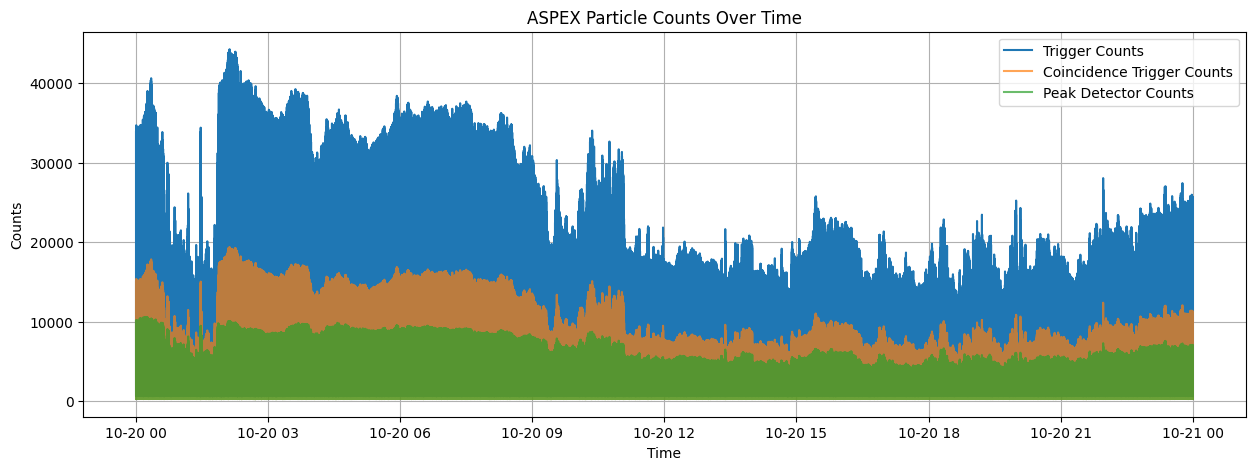

In [7]:
import matplotlib.pyplot as plt

# Convert list columns to scalar by summing each row
trig_counts_sum = data_pd['trig_counts'].apply(lambda x: np.sum(x))
coin_trig_counts_sum = data_pd['coin_trig_counts'].apply(lambda x: np.sum(x))
peak_det_counts_sum = data_pd['peak_det_counts'].apply(lambda x: np.sum(x))

plt.figure(figsize=(15, 5))
plt.plot(data_pd['epoch_for_cdf'], trig_counts_sum, label='Trigger Counts')
plt.plot(data_pd['epoch_for_cdf'], coin_trig_counts_sum, label='Coincidence Trigger Counts', alpha=0.7)
plt.plot(data_pd['epoch_for_cdf'], peak_det_counts_sum, label='Peak Detector Counts', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Counts")
plt.title("ASPEX Particle Counts Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Safely reduce each entry to total count
def flatten_and_sum(count_entry):
    try:
        return np.sum(count_entry)
    except Exception:
        return np.nan  # in case of malformed data

data_pd['trig_sum'] = data_pd['trig_counts'].apply(flatten_and_sum)
data_pd['coin_sum'] = data_pd['coin_trig_counts'].apply(flatten_and_sum)
data_pd['peak_sum'] = data_pd['peak_det_counts'].apply(flatten_and_sum)


In [9]:
data_pd['trig_sum']

0         33858
1          1708
2           769
3           813
4           788
          ...  
172782      840
172783      803
172784      808
172785      764
172786      783
Name: trig_sum, Length: 172787, dtype: uint64

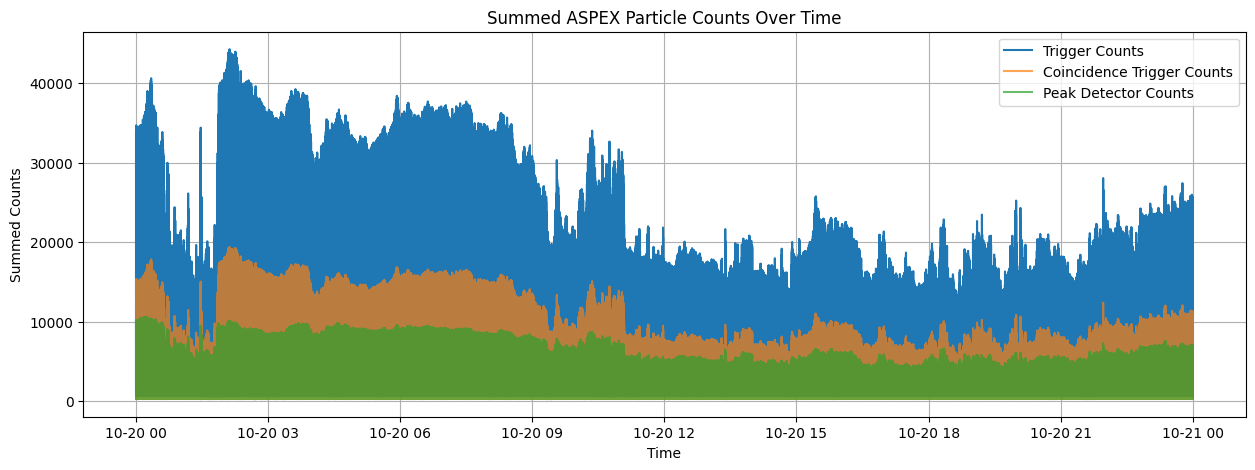

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(data_pd['epoch_for_cdf'], data_pd['trig_sum'], label='Trigger Counts')
plt.plot(data_pd['epoch_for_cdf'], data_pd['coin_sum'], label='Coincidence Trigger Counts', alpha=0.7)
plt.plot(data_pd['epoch_for_cdf'], data_pd['peak_sum'], label='Peak Detector Counts', alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Summed Counts")
plt.title("Summed ASPEX Particle Counts Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
data_pd['Time'] = data_pd['epoch_for_cdf']

In [12]:
threshold = data_pd['trig_sum'].mean() + 3 * data_pd['trig_sum'].std()
cme_spikes = data_pd[data_pd['trig_sum'] > threshold]

In [13]:
threshold # 26389.012472526065

np.float64(26389.012472526065)

In [14]:
cme_events = data_pd[data_pd['trig_sum'] > threshold]

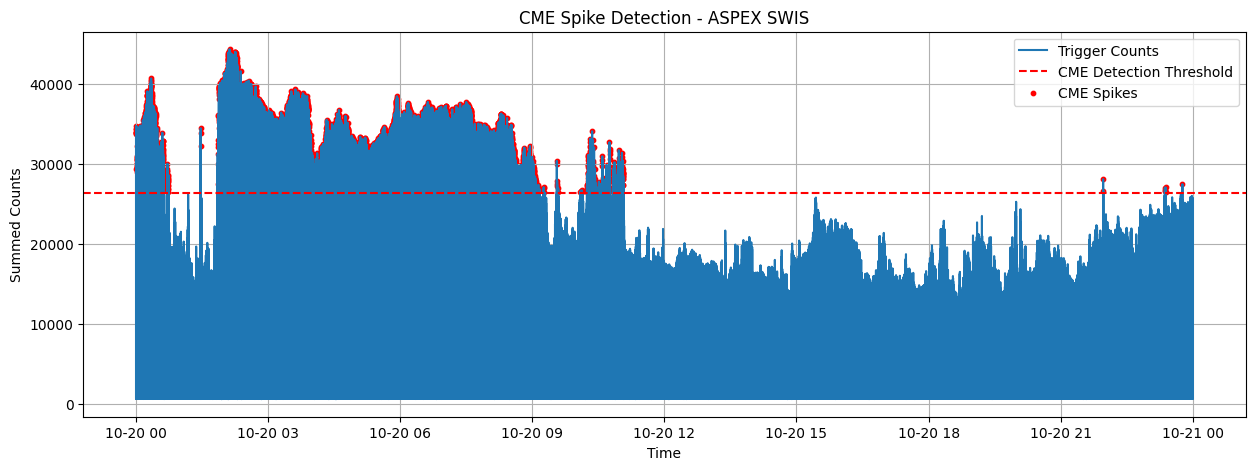

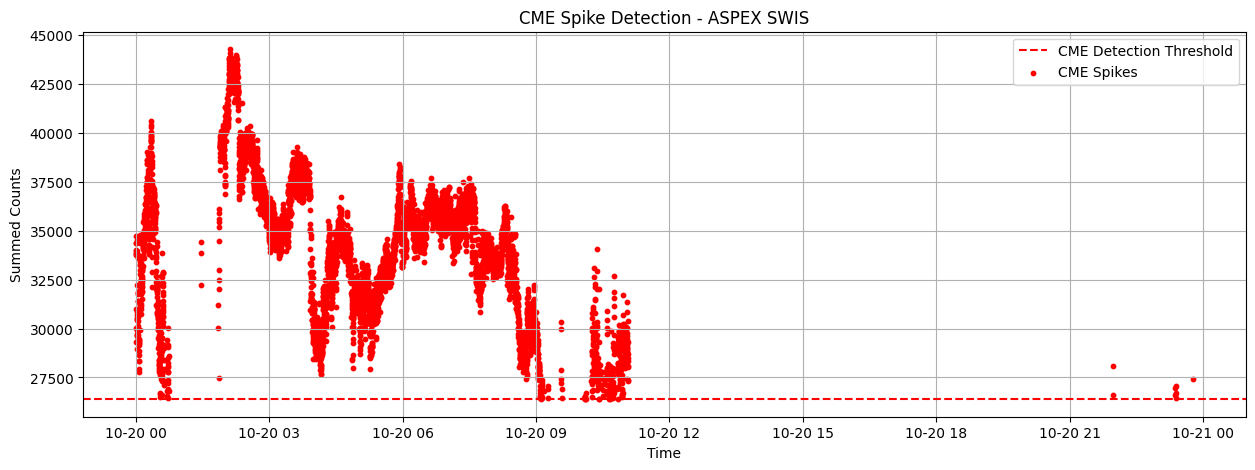

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(data_pd['Time'], data_pd['trig_sum'], label='Trigger Counts')
plt.axhline(threshold, color='red', linestyle='--', label='CME Detection Threshold')
plt.scatter(cme_events['Time'], cme_events['trig_sum'], color='red', label='CME Spikes', s=10)
plt.xlabel("Time")
plt.ylabel("Summed Counts")
plt.title("CME Spike Detection - ASPEX SWIS")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 5))
# plt.plot(data_pd['Time'], data_pd['trig_sum'], label='Trigger Counts')
plt.axhline(threshold, color='red', linestyle='--', label='CME Detection Threshold')
plt.scatter(cme_events['Time'], cme_events['trig_sum'], color='red', label='CME Spikes', s=10)
plt.xlabel("Time")
plt.ylabel("Summed Counts")
plt.title("CME Spike Detection - ASPEX SWIS")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
t2 = cme_events['Time'].iloc[0]  # First spike timestamp (UTC)
print("Detection Time (T2):", t2)


Detection Time (T2): 2024-10-20 00:00:05.818000


In [17]:
cme_spikes

,epoch_for_cdf,Time,obs_time,DC_temp,energy_mode_01,energy_mode_02,x_pos,y_pos,z_pos,x_vel,...,coin_trig_counts,rej_counts,peak_det_counts,pile_up_time,HW_LLD,SW_LLD,SW_ULD,trig_sum,coin_sum,peak_sum
0,2024-10-20 00:00:05.818,2024-10-20 00:00:05.818,1.729382e+09,1427,0,0,1.597849e+06,-415251.669855,110073.389544,-0.071059,...,"[[25, 103, 812, 70, 146], [95, 447, 2544, 307,...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0...","[[25, 97, 676, 66, 142], [92, 391, 1241, 269, ...",520,"[50, 50, 50, 50, 50]","[0, 0, 0, 0, 0]","[2666, 2666, 2666, 2666, 2666]",33858,14983,10100
9,2024-10-20 00:00:10.318,2024-10-20 00:00:10.318,1.729382e+09,1426,0,0,1.597849e+06,-415252.675655,110073.272297,-0.071059,...,"[[38, 153, 1091, 94, 674], [75, 336, 2134, 213...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0...","[[35, 144, 815, 92, 589], [74, 311, 1164, 196,...",520,"[50, 50, 50, 50, 50]","[0, 0, 0, 0, 0]","[2666, 2666, 2666, 2666, 2666]",34018,15043,10056
20,2024-10-20 00:00:15.818,2024-10-20 00:00:15.818,1.729382e+09,1427,0,0,1.597849e+06,-415253.905014,110073.128989,-0.071059,...,"[[30, 130, 1006, 99, 180], [98, 477, 2826, 322...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0...","[[30, 124, 766, 96, 179], [93, 413, 1219, 289,...",520,"[50, 50, 50, 50, 50]","[0, 0, 0, 0, 0]","[2666, 2666, 2666, 2666, 2666]",33829,14991,10016
29,2024-10-20 00:00:20.318,2024-10-20 00:00:20.318,1.729382e+09,1427,0,0,1.597848e+06,-415254.910833,110073.011738,-0.071059,...,"[[28, 136, 977, 96, 602], [67, 268, 1866, 182,...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0...","[[27, 133, 773, 87, 521], [65, 248, 1126, 172,...",520,"[50, 50, 50, 50, 50]","[0, 0, 0, 0, 0]","[2666, 2666, 2666, 2666, 2666]",34391,15216,10075
40,2024-10-20 00:00:25.818,2024-10-20 00:00:25.818,1.729382e+09,1427,0,0,1.597848e+06,-415256.140165,110072.868431,-0.071059,...,"[[30, 120, 895, 81, 128], [133, 573, 3059, 362...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0...","[[30, 113, 720, 79, 128], [126, 482, 1254, 316...",520,"[50, 50, 50, 50, 50]","[0, 0, 0, 0, 0]","[2666, 2666, 2666, 2666, 2666]",34726,15397,10183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168248,2024-10-20 23:22:10.560,2024-10-20 23:22:10.560,1.729467e+09,1429,0,0,1.591840e+06,-433746.435220,107820.661676,-0.071865,...,"[[0, 4, 22, 4, 103], [12, 33, 297, 24, 219], [...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0...","[[0, 4, 22, 4, 99], [12, 33, 273, 24, 203], [5...",520,"[50, 50, 50, 50, 50]","[0, 0, 0, 0, 0]","[2666, 2666, 2666, 2666, 2666]",26589,11765,7465
168308,2024-10-20 23:22:40.560,2024-10-20 23:22:40.560,1.729467e+09,1429,0,0,1.591838e+06,-433752.917570,107819.836631,-0.071866,...,"[[5, 5, 35, 3, 104], [7, 33, 305, 27, 212], [4...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0...","[[5, 5, 34, 3, 102], [7, 32, 282, 25, 204], [4...",520,"[50, 50, 50, 50, 50]","[0, 0, 0, 0, 0]","[2666, 2666, 2666, 2666, 2666]",26698,11806,7534
168321,2024-10-20 23:22:47.060,2024-10-20 23:22:47.060,1.729467e+09,1429,0,0,1.591837e+06,-433754.322102,107819.657865,-0.071866,...,"[[141, 623, 3178, 461, 330], [145, 565, 2843, ...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0...","[[136, 502, 1244, 390, 304], [142, 472, 1238, ...",520,"[50, 50, 50, 50, 50]","[0, 0, 0, 0, 0]","[2666, 2666, 2666, 2666, 2666]",27056,12031,7598
168328,2024-10-20 23:22:50.560,2024-10-20 23:22:50.560,1.729467e+09,1429,0,0,1.591837e+06,-433755.078320,107819.561614,-0.071866,...,"[[3, 4, 23, 2, 93], [4, 39, 277, 19, 199], [41...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0...","[[3, 4, 23, 2, 92], [4, 39, 265, 19, 184], [41...",520,"[50, 50, 50, 50, 50]","[0, 0, 0, 0, 0]","[2666, 2666, 2666, 2666, 2666]",26443,11701,7445


In [18]:
t2 = cme_events['epoch_for_cdf'].iloc[0]  # First spike timestamp (UTC)
print("Detection Time (T2):", t2)


Detection Time (T2): 2024-10-20 00:00:05.818000


In [19]:
from datetime import datetime
t1 = datetime.strptime("2024-10-20 00:00:00", "%Y-%m-%d %H:%M:%S")


In [20]:
t1

datetime.datetime(2024, 10, 20, 0, 0)

## Finding initital time that cme start

In [21]:
D = 1.5e6  # km (distance from Sun to L1)

delta_t = (t2 - t1).total_seconds()  # in seconds
cme_speed_kms = D / delta_t

print(f"CME Speed: {cme_speed_kms:.2f} km/s")

CME Speed: 257820.56 km/s


In [26]:
from spacepy.time import CDFepoch

data_pd['time'] = data_pd['epoch_for_cdf'].apply(lambda x: CDFepoch.to_datetime(x[0]))

AttributeError: module 'spacepy.pycdf' has no attribute 'CDFepoch'

In [28]:
data_pd['trig_sum'] = data_pd['trig_counts'].apply(np.sum)
data_pd['coin_sum'] = data_pd['coin_trig_counts'].apply(np.sum)
data_pd['peak_sum'] = data_pd['peak_det_counts'].apply(np.sum)

In [30]:
T2 = cme_events['Time'].iloc[0]

In [32]:
import numpy as np

data_pd['distance_km'] = np.sqrt(
    data_pd['x_pos']**2 + 
    data_pd['y_pos']**2 + 
    data_pd['z_pos']**2
)


In [33]:
data_pd.columns

Index(['epoch_for_cdf', 'Time', 'obs_time', 'DC_temp', 'energy_mode_01',
       'energy_mode_02', 'x_pos', 'y_pos', 'z_pos', 'x_vel', 'y_vel', 'z_vel',
       'angle_xgse', 'angle_ygse', 'angle_zgse', 'trig_counts',
       'coin_trig_counts', 'rej_counts', 'peak_det_counts', 'pile_up_time',
       'HW_LLD', 'SW_LLD', 'SW_ULD', 'trig_sum', 'coin_sum', 'peak_sum',
       'distance_km'],
      dtype='object')

In [34]:
D = data_pd.loc[data_pd['Time'] == T2, 'distance_km'].values[0]

In [35]:
from datetime import timedelta

delta_t = timedelta(seconds=D / cme_speed_kms)
T1_estimate = T2 - delta_t


In [39]:
threshold

np.float64(26389.012472526065)

In [38]:
T2

Timestamp('2024-10-20 00:00:05.818000')

In [36]:
T1_estimate

Timestamp('2024-10-19 23:59:59.400392')